Ref: https://www.python-course.eu/k_nearest_neighbor_classifier.php

In [1]:
#number of applications
num_apps = 800

#number admiited
num_admitted =30

print ('Probability that any applicant will be admitted : ' + str( num_admitted/num_apps*100 ) + '%' )

Probability that any applicant will be admitted : 3.75%


## Data Preparation

In [2]:
import numpy as np

np.random.seed(54)

#Randomising our inputs
a=np.random.randint(1,10,num_apps)
b=np.random.randint(1,10,num_apps)
c=np.random.randint(1,10,num_apps)

# X1 = (self-directedness, technical proficiency, communication skills), y1 = 1 or 0 
X1=list(zip(a,b,c))


In [3]:
import pandas as pd

#data prep
df = pd.DataFrame(X1)
df.columns = ['Self-directedness' , 'Technical', 'Communication']

#add total column to sum up the attributes for analysis
df['Total'] = df.sum(axis=1)

#initialise all targets to 0
df['Target'] = 0

print('Number of applicants who scored 22 and above : ' + str( len(df[df['Total']>=22]) ) )

#retrieve array of indices of applicants who scored 22 and above
top_idx = df[df['Total']>=22].index
top_idx = list(top_idx)

#random selection of admitted applicants
import random
random.seed(23)
selected_idx = random.sample(top_idx, num_admitted)  #this is a different function from np.random.sample

#assign 1 to Target
for i in selected_idx:
    df.loc[i,'Target']=1

print('Number of applicants who are admitted : ' + str( len(df[df['Target']==1]) ) )    

#test whether our plan worked
assert(len(df[df['Target']==1]) == num_admitted)

Number of applicants who scored 22 and above : 70
Number of applicants who are admitted : 30


## Target List

In [4]:
print(df[df['Target']==1])

     Self-directedness  Technical  Communication  Total  Target
16                   7          9              8     24       1
24                   9          9              9     27       1
26                   8          9              9     26       1
53                   9          9              4     22       1
81                   8          8              8     24       1
100                  9          7              8     24       1
144                  7          9              9     25       1
168                  9          7              8     24       1
182                  9          6              7     22       1
186                  6          9              8     23       1
209                  9          9              8     26       1
230                  6          9              8     23       1
260                  8          6              8     22       1
293                  6          7              9     22       1
305                  6          8       

## Getting to y

In [5]:
y = df.loc[:,'Target'].values

X = np.array(X1)

print (X.shape)
print (y.shape)


(800, 3)
(800,)


In [6]:
a=16
b=27
print(X1[a:b])
print(y[a:b])


[(7, 9, 8), (9, 2, 3), (8, 2, 4), (4, 3, 3), (3, 3, 8), (2, 7, 4), (3, 4, 4), (7, 2, 8), (9, 9, 9), (2, 8, 1), (8, 9, 9)]
[1 0 0 0 0 0 0 0 1 0 1]


In [7]:
indices = np.random.permutation(len(X))
n_training_samples = 28
learnset_data = X[indices[:-n_training_samples]]
learnset_labels = y[indices[:-n_training_samples]]
testset_data = X[indices[-n_training_samples:]]
testset_labels = y[indices[-n_training_samples:]]
print(learnset_data[:4], learnset_labels[:4])
print(testset_data[:4], testset_labels[:4])

[[9 7 8]
 [6 4 7]
 [5 4 4]
 [3 7 4]] [1 0 0 0]
[[5 6 8]
 [3 9 5]
 [3 3 1]
 [9 6 7]] [0 0 0 1]


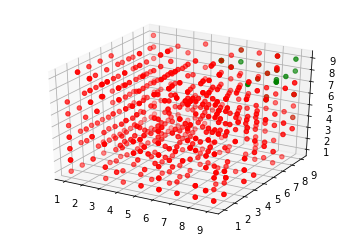

In [8]:
# following line is only necessary, if you use ipython notebook!!!
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(learnset_data)):
        if learnset_labels[i] == iclass:
            X[iclass][0].append(learnset_data[i][0])
            X[iclass][1].append(learnset_data[i][1])
            X[iclass][2].append(learnset_data[i][2])
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
       ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

Cannot really see the greens and yellows as they all have the same distribution as the red

## Determining the Neighbours

In [9]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)

print(distance([3, 5], [1, 1]))
print(distance(learnset_data[3], learnset_data[44]))

4.47213595499958
6.164414002968976


In [10]:
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where 
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [11]:
for i in range(5):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print(i, 
          testset_data[i], 
          testset_labels[i], 
          neighbors)
    

0 [5 6 8] 0 [(array([5, 6, 8]), 0.0, 0), (array([4, 6, 8]), 1.0, 0), (array([5, 6, 7]), 1.0, 0)]
1 [3 9 5] 0 [(array([3, 9, 4]), 1.0, 0), (array([3, 9, 4]), 1.0, 0), (array([3, 9, 6]), 1.0, 0)]
2 [3 3 1] 0 [(array([3, 4, 1]), 1.0, 0), (array([4, 3, 1]), 1.0, 0), (array([3, 3, 2]), 1.0, 0)]
3 [9 6 7] 1 [(array([9, 6, 7]), 0.0, 1), (array([9, 6, 7]), 0.0, 0), (array([9, 6, 7]), 0.0, 0)]
4 [3 7 3] 0 [(array([3, 7, 3]), 0.0, 0), (array([3, 7, 4]), 1.0, 0), (array([3, 8, 3]), 1.0, 0)]


## Voting to get a single result

In [12]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [13]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print(neighbors)

[(array([5, 6, 8]), 0.0, 0), (array([4, 6, 8]), 1.0, 0), (array([5, 6, 7]), 1.0, 0)]
[(array([3, 9, 4]), 1.0, 0), (array([3, 9, 4]), 1.0, 0), (array([3, 9, 6]), 1.0, 0)]
[(array([3, 4, 1]), 1.0, 0), (array([4, 3, 1]), 1.0, 0), (array([3, 3, 2]), 1.0, 0)]
[(array([9, 6, 7]), 0.0, 1), (array([9, 6, 7]), 0.0, 0), (array([9, 6, 7]), 0.0, 0)]
[(array([3, 7, 3]), 0.0, 0), (array([3, 7, 4]), 1.0, 0), (array([3, 8, 3]), 1.0, 0)]
[(array([1, 1, 1]), 1.0, 0), (array([3, 1, 1]), 1.0, 0), (array([1, 2, 1]), 1.4142135623730951, 0)]
[(array([8, 8, 8]), 0.0, 0), (array([8, 8, 8]), 0.0, 1), (array([8, 9, 8]), 1.0, 0)]
[(array([9, 4, 6]), 0.0, 0), (array([9, 3, 6]), 1.0, 0), (array([9, 5, 6]), 1.0, 0)]
[(array([2, 5, 2]), 0.0, 0), (array([2, 5, 2]), 0.0, 0), (array([2, 5, 3]), 1.0, 0)]
[(array([1, 2, 1]), 1.0, 0), (array([3, 2, 1]), 1.0, 0), (array([3, 2, 1]), 1.0, 0)]
[(array([1, 1, 2]), 0.0, 0), (array([1, 1, 2]), 0.0, 0), (array([1, 1, 2]), 0.0, 0)]
[(array([4, 8, 8]), 1.0, 0), (array([4, 8, 8]), 1.

In [14]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

index:  0 , result of vote:  0 , label:  0 , data:  [5 6 8]
index:  1 , result of vote:  0 , label:  0 , data:  [3 9 5]
index:  2 , result of vote:  0 , label:  0 , data:  [3 3 1]
index:  3 , result of vote:  0 , label:  1 , data:  [9 6 7]
index:  4 , result of vote:  0 , label:  0 , data:  [3 7 3]
index:  5 , result of vote:  0 , label:  0 , data:  [2 1 1]
index:  6 , result of vote:  0 , label:  0 , data:  [8 8 8]
index:  7 , result of vote:  0 , label:  0 , data:  [9 4 6]
index:  8 , result of vote:  0 , label:  0 , data:  [2 5 2]
index:  9 , result of vote:  0 , label:  0 , data:  [2 2 1]
index:  10 , result of vote:  0 , label:  0 , data:  [1 1 2]
index:  11 , result of vote:  0 , label:  0 , data:  [3 8 8]
index:  12 , result of vote:  0 , label:  0 , data:  [8 8 4]
index:  13 , result of vote:  0 , label:  0 , data:  [2 6 6]
index:  14 , result of vote:  0 , label:  0 , data:  [2 5 6]
index:  15 , result of vote:  0 , label:  0 , data:  [2 4 9]
index:  16 , result of vote:  0 , 

In [15]:
def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)

In [16]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              5, 
                              distance=distance)
    print("index: ", i, 
          ", vote_prob: ", vote_prob(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

index:  0 , vote_prob:  (0, 1.0) , label:  0 , data:  [5 6 8]
index:  1 , vote_prob:  (0, 1.0) , label:  0 , data:  [3 9 5]
index:  2 , vote_prob:  (0, 1.0) , label:  0 , data:  [3 3 1]
index:  3 , vote_prob:  (0, 0.8) , label:  1 , data:  [9 6 7]
index:  4 , vote_prob:  (0, 1.0) , label:  0 , data:  [3 7 3]
index:  5 , vote_prob:  (0, 1.0) , label:  0 , data:  [2 1 1]
index:  6 , vote_prob:  (0, 0.6) , label:  0 , data:  [8 8 8]
index:  7 , vote_prob:  (0, 1.0) , label:  0 , data:  [9 4 6]
index:  8 , vote_prob:  (0, 1.0) , label:  0 , data:  [2 5 2]
index:  9 , vote_prob:  (0, 1.0) , label:  0 , data:  [2 2 1]
index:  10 , vote_prob:  (0, 1.0) , label:  0 , data:  [1 1 2]
index:  11 , vote_prob:  (0, 1.0) , label:  0 , data:  [3 8 8]
index:  12 , vote_prob:  (0, 1.0) , label:  0 , data:  [8 8 4]
index:  13 , vote_prob:  (0, 1.0) , label:  0 , data:  [2 6 6]
index:  14 , vote_prob:  (0, 1.0) , label:  0 , data:  [2 5 6]
index:  15 , vote_prob:  (0, 1.0) , label:  0 , data:  [2 4 9]
in

## The Weighted Nearest Neighbour Classifier

In [17]:
def vote_harmonic_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        class_counter[neighbors[index][2]] += 1/(index+1)
    labels, votes = zip(*class_counter.most_common())
    #print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
             class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

In [18]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              6, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", 
          vote_harmonic_weights(neighbors,
                                all_results=True),
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

index:  0 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [5 6 8]
index:  1 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [3 9 5]
index:  2 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [3 3 1]
index:  3 , result of vote:  (0, [(0, 0.5918367346938775), (1, 0.4081632653061224)]) , label:  1 , data:  [9 6 7]
index:  4 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [3 7 3]
index:  5 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [2 1 1]
index:  6 , result of vote:  (0, [(0, 0.6462585034013606), (1, 0.35374149659863946)]) , label:  0 , data:  [8 8 8]
index:  7 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [9 4 6]
index:  8 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [2 5 2]
index:  9 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [2 2 1]
index:  10 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [1 1 2]
index:  11 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [3 8 8]
index:  12 , result of vote: 

In [19]:
def vote_distance_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        dist = neighbors[index][1]
        label = neighbors[index][2]
        class_counter[label] += 1 / (dist**2 + 1)
    labels, votes = zip(*class_counter.most_common())
    #print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
             class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

In [20]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              6, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote_distance_weights(neighbors,
                                                      all_results=True),
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])
        

index:  0 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [5 6 8]
index:  1 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [3 9 5]
index:  2 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [3 3 1]
index:  3 , result of vote:  (0, [(0, 0.7777777777777778), (1, 0.2222222222222222)]) , label:  1 , data:  [9 6 7]
index:  4 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [3 7 3]
index:  5 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [2 1 1]
index:  6 , result of vote:  (0, [(0, 0.5), (1, 0.5)]) , label:  0 , data:  [8 8 8]
index:  7 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [9 4 6]
index:  8 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [2 5 2]
index:  9 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [2 2 1]
index:  10 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [1 1 2]
index:  11 , result of vote:  (0, [(0, 1.0)]) , label:  0 , data:  [3 8 8]
index:  12 , result of vote:  (0, [(0, 1.0)]) , label:  0 , 

Seems likely that the problem is the made-up data